In [39]:
from scipy import ndimage, datasets
import matplotlib.pyplot as plt
import numpy as np
    

def set_min_max(image, min_val, max_val):
    if image.dtype != np.float32:
        image = image.astype('float32')

    # Calculate the current minimum and maximum values for each channel
    orig_min = image.min(axis=(0, 1), keepdims=True)
    orig_max = image.max(axis=(0, 1), keepdims=True)

    # Scale the image from the original range to 0-1 range
    scaled_image = (image - orig_min) / (orig_max - orig_min)

    # Scale from 0-1 range to new_min-new_max range and clamp to ensure values are within 0-255
    result_image = (scaled_image * (max_val - min_val) + min_val).clip(0, 255).astype('uint8')

    return result_image


def split_colors_rgb(image):
    red_component = image.copy()
    red_component[:, :, (1, 2)] = 0

    green_component = image.copy()
    green_component[:, :, (0, 2)] = 0

    blue_component = image.copy()
    blue_component[:, :, (0, 1)] = 0

    return red_component, green_component, blue_component


def rgb2gray(rgb_image):
    return np.dot(rgb_image[..., :3], [0.2989, 0.5870, 0.1140])


def blur(image, sigma=3):
    blurred_image = ndimage.gaussian_filter(image, sigma=sigma)
    return blurred_image


### 1. Обрати довільне зображення, розміром не менше, ніж 600х600. Використовувати matplotlib для відображення після кожного кроку.

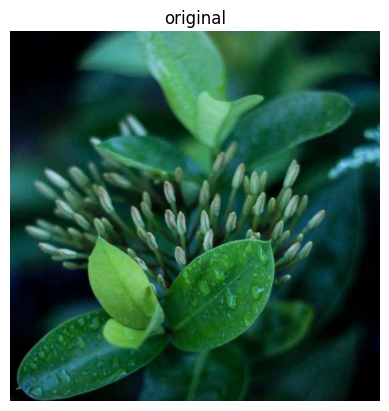

In [40]:
image = plt.imread('C:\\Users\\Andrii\\Desktop\\Test2.jpg')
plt.imshow(image)
plt.axis('off')
plt.title("original")
plt.show()

### 2. Збільшити контрастність зображення, встановивши мінімальне та максимальне значення кольорів. 

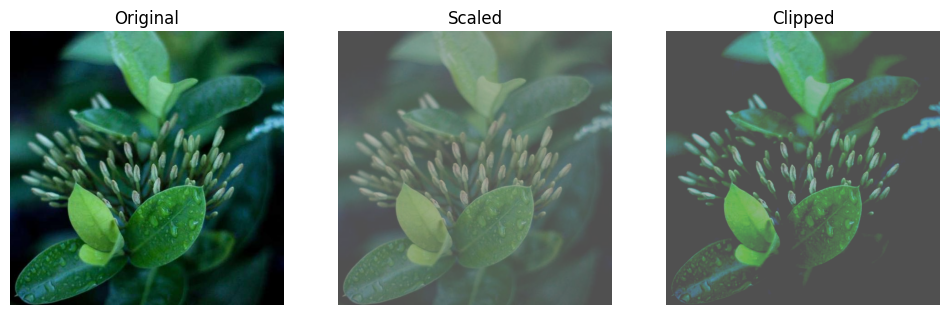

In [41]:
image_scaled = set_min_max(image, 80, 180)
image_clipped = np.clip(image, 80, 180)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(image_scaled)
plt.axis('off')
plt.title("Scaled")

plt.subplot(1, 3, 3)
plt.imshow(image_clipped)
plt.axis('off')
plt.title("Clipped")

plt.show()


### 3. Розбити оригінальне зображення на окремі кольорові компоненти.

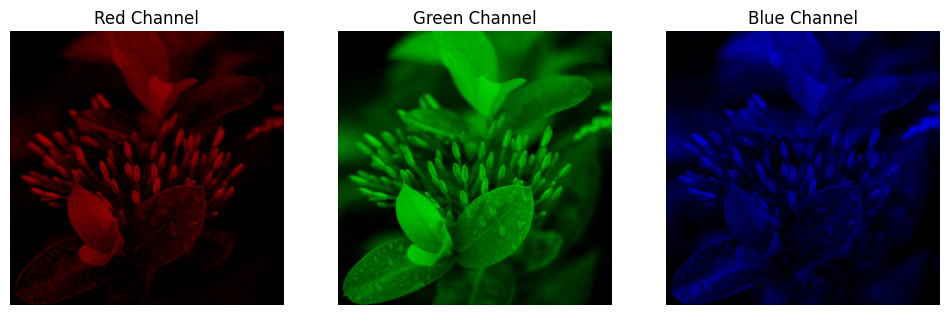

In [42]:
image_red, image_green, image_blue = split_colors_rgb(image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_red, cmap="gray")
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_green, cmap="gray")
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_blue, cmap="gray")
plt.title('Blue Channel')
plt.axis('off')

plt.show()

### 4. Трансформувати кольорове зображення в чорно-біле

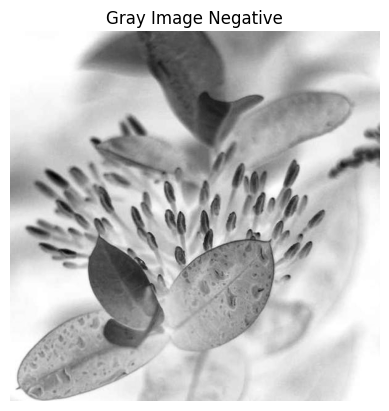

In [43]:
image_gray = rgb2gray(image)
image_gray = 255 - image_gray

plt.imshow(image_gray, cmap="gray")
plt.axis('off')
plt.title("Gray Image Negative")
plt.show()

### 5. Розмити зображення

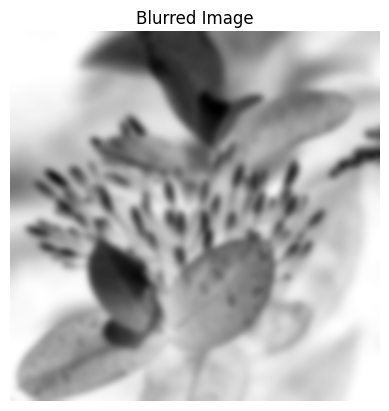

In [44]:
image_blur = blur(image_gray, sigma=5)

plt.imshow(image_blur, cmap="gray")
plt.axis('off')
plt.title("Blurred Image")
plt.show()

### 6. Зробити edge detection

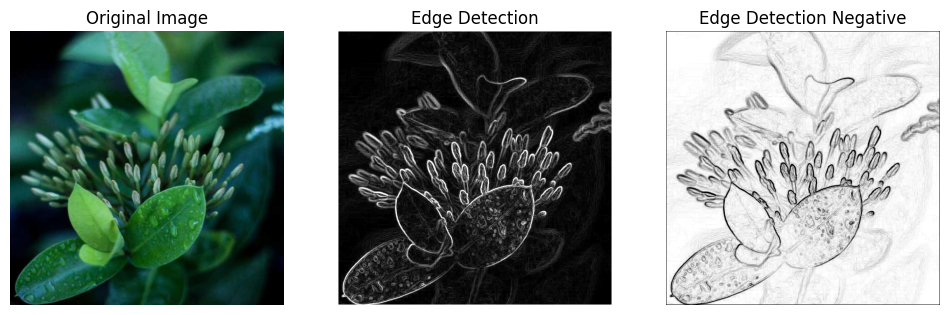

In [45]:
sx = ndimage.sobel(image_gray, axis=0, mode='constant')  # horizontal derivative
sy = ndimage.sobel(image_gray, axis=1, mode='constant')  # vertical derivative

# Calculate the magnitude of the gradient
sobel = np.hypot(sx, sy)
# sobel = set_min_max(sobel, 50, 200)
# sobel = set_min_max(sobel, 0, 255)
sobel = np.clip(sobel, 0, 255)
sobel_negative = 255 - sobel

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sobel, cmap="gray")
plt.title('Edge Detection')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_negative, cmap="gray")
plt.title('Edge Detection Negative')
plt.axis('off')

plt.show()

In [46]:
print(sobel.min())
print(sobel.max())
print(type(sobel))
print(sobel.shape)


0.0
255.0
<class 'numpy.ndarray'>
(600, 600)
